In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
import os
os.getcwd()
os.chdir('..')


In [3]:
os.getcwd()

'C:\\Users\\Prabal Kuinkel\\Desktop\\Data Analyst\\100-Days-of-ML'

In [4]:
df = pd.read_csv('Data-sets\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#Converting the Month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df.head(3)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [9]:
df.index

RangeIndex(start=0, stop=144, step=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='#Passengers'>

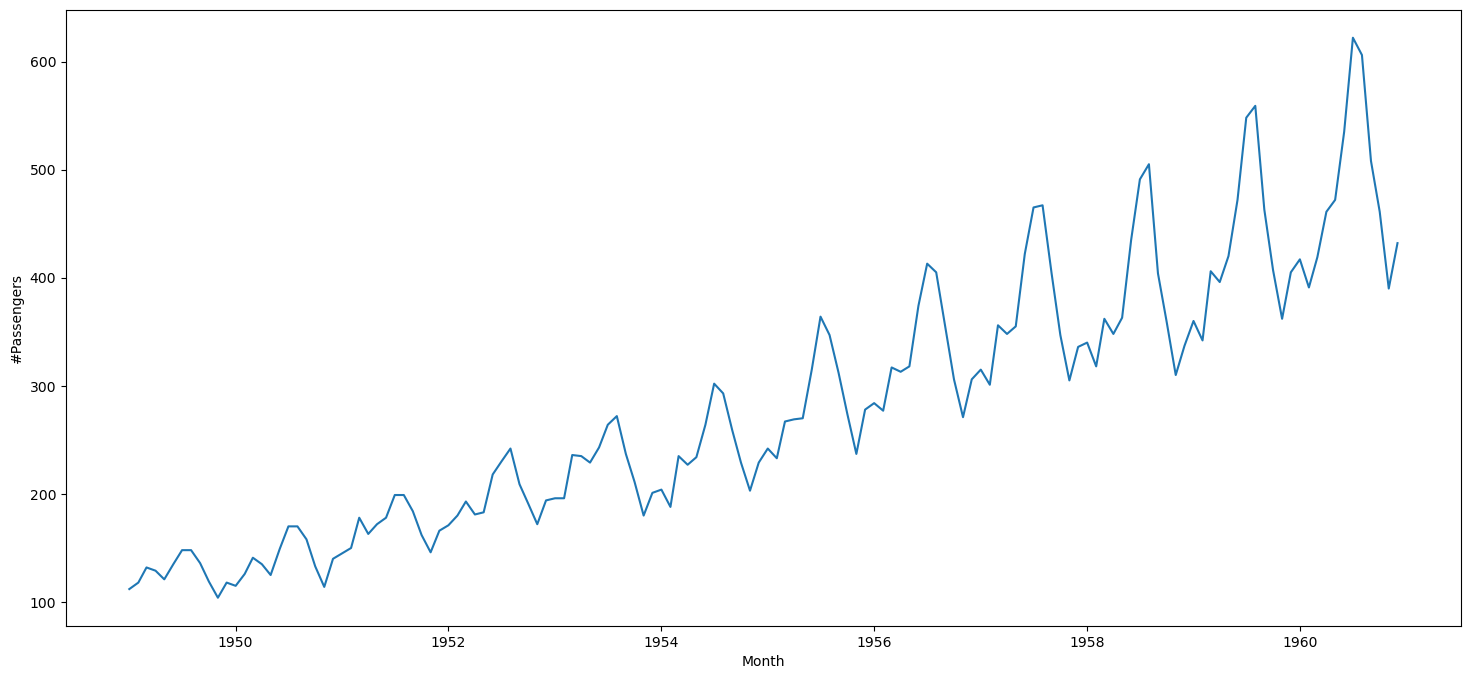

In [10]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='Month',y='#Passengers')

### In the above line plot we can observe that there is Trend(Increasing) component and also the seasonality component (since the patterns / spikes are visible after certain fixed interval of time)

# Now we check if the Time-Series is stationary or not

## Technique-1 Using self observation/Summary Statistics ---->>> This technique may be misleading to human eyes

In this technique we divide the entire data sets into multiple dataframe(2 or more with equal datapoints) and we calculate
the mean, variance of all the dataframe .Then we compare the mean and varaince of all the data frame and see how much are they being deviated .Incase of high deviation we can say that in preliminary check for stationarity that the Time-series data is not stationary  

In [11]:
# we are extracting the values of '#Passenger' Column dividing into 2 equal halves and calculating the mean 
# and varaince of both halves to check if there is high deviation/Fluctaution .

from pandas import read_csv
#series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X_new = df['#Passengers'].values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1 =X1.mean()
mean2 = X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='#Passengers', ylabel='Count'>

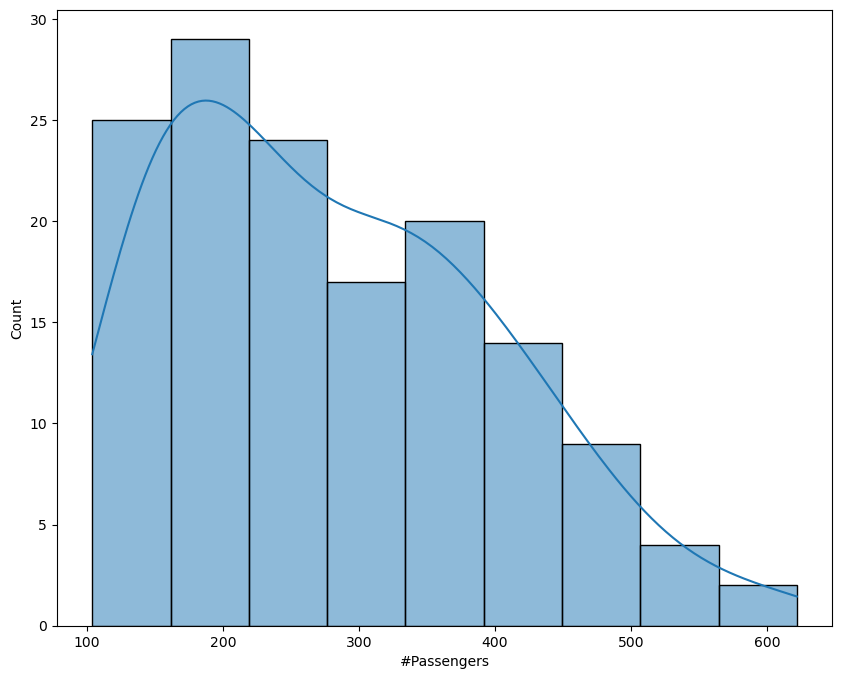

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='#Passengers',kde=True)

1) Values not looking like Gaussian, therefore mean & variance values are less meaningful
2) Since there is high fluctuation in mean and variance so for perliminary test we can say that the data is stationary

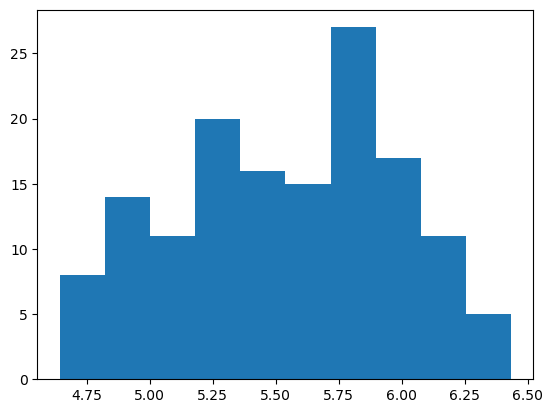

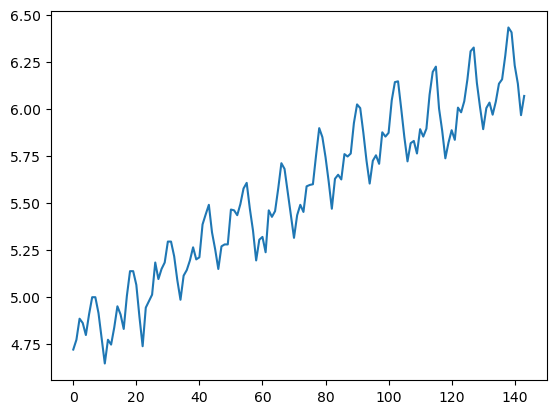

In [13]:
# A log transform can be used to flatten out exponential change back to a linear relationship.
from numpy import log
X_log = log(df['#Passengers'].values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

# Technique-2 STATISTICAL TEST


## Using Angumented Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [15]:
df.set_index('Month', inplace=True)  #Set Month(i.e 'time' column) as the Index (Optional but Common for Time Series):

In [18]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
adf_test(df)


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
